<a href="https://colab.research.google.com/github/MohamedSelim-dev/AcrosProjectBootstrap/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#usless column (alive->survived,sibsp->alone,embarked->embark_twon,who+adult_male->sex+age, class->pclass, deck 80% missing)

In [7]:
df.drop(['adult_male','who','alive','alone','embarked','class','deck'],inplace=True,axis=1)

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
dtype: int64

In [9]:
#Handle missing value

In [10]:
#embark_town -> drop two missing value in row

In [11]:
df.dropna(subset=['embark_town'],inplace=True)

In [12]:
#age -> mean , median

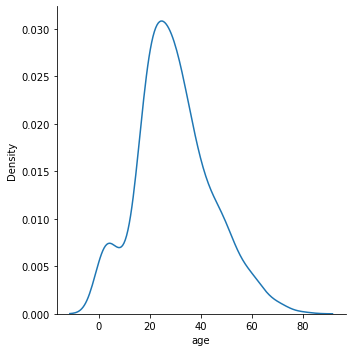

In [25]:
sns.displot(df,x='age', kind='kde')

In [26]:
df['age'].fillna(df['age'].median(),inplace=True)

In [28]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
dtype: int64

In [13]:
#Handle categorical value

In [30]:
df['sex'].value_counts()

male      577
female    312
Name: sex, dtype: int64

In [31]:
encoded = {'female':1,'male':2}

In [32]:
df['sex'] =df['sex'].map(encoded)

In [34]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [35]:
encoded = {'Queenstown':1,'Cherbourg':2,'Southampton':3}

In [36]:
df['embark_town'] =df['embark_town'].map(encoded)

In [37]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,2,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,2,35.0,0,0,8.0500,3


In [14]:
#split data to train & test

In [40]:
X = df.drop('survived', axis=1)
y= df['survived']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [42]:
x_train

,pclass,sex,age,sibsp,parch,fare,embark_town
459,3,2,28.0,0,0,7.7500,1
62,1,2,45.0,1,0,83.4750,3
536,1,2,45.0,0,0,26.5500,3
219,2,2,30.0,0,0,10.5000,3
768,3,2,28.0,1,0,24.1500,1
...,...,...,...,...,...,...,...
800,2,2,34.0,0,0,13.0000,3
543,2,2,32.0,1,0,26.0000,3
602,1,2,28.0,0,0,42.4000,3
43,2,1,3.0,1,2,41.5792,2


In [43]:
x_test

,pclass,sex,age,sibsp,parch,fare,embark_town
180,3,1,28.0,8,2,69.5500,3
439,2,2,31.0,0,0,10.5000,3
583,1,2,36.0,0,0,40.1250,2
677,3,1,18.0,0,0,9.8417,3
850,3,2,4.0,4,2,31.2750,3
...,...,...,...,...,...,...,...
85,3,1,33.0,3,0,15.8500,3
821,3,2,27.0,0,0,8.6625,3
796,1,1,49.0,0,0,25.9292,3
287,3,2,22.0,0,0,7.8958,3


In [44]:
y_train

459    0
62     0
536    0
219    0
768    0
      ..
800    0
543    1
602    0
43     1
888    0
Name: survived, Length: 711, dtype: int64

In [45]:
y_test

180    0
439    0
583    0
677    1
850    0
      ..
85     1
821    1
796    1
287    0
241    1
Name: survived, Length: 178, dtype: int64